In [1]:
#First, I am going to import some libraries.

import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('steps.csv', sep=';' , engine='python') #getting data and dataframe while also converting the seperator. 
df1.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df2 = pd.read_csv('survey.csv') #getting the other dataset.
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


I wanted to get the information on df2 because there were too many columns in the combined datafile

In [3]:
df2.info() #Get information on the variables. I wanted to see which columns were objects and found out all of them were from df2.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           929 non-null    int64  
 1   city         929 non-null    object 
 2   gender       929 non-null    object 
 3   age          929 non-null    object 
 4   hh_size      929 non-null    int64  
 5   education    929 non-null    int64  
 6   education_1  929 non-null    object 
 7   height       928 non-null    float64
 8   weight       927 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 65.4+ KB


In [4]:
df = pd.merge(df2, df1, on = 'id') #'id' is the common identifier and I am going to merge through that one.
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['weight'].value_counts() #I wanted to see what kind of values were in the variable and some were quite weird, such as 700.

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
101.0     1
20.0      1
700.0     1
37.0      1
6.0       1
Name: weight, Length: 72, dtype: int64

In [6]:
#Drop values for plot because the values are not realistic. 

def above_150(x):
    if(x > 150): 
        return float('NaN')
    else: 
        return x
    
def under_35(x):
    if(x < 35):
        return float('NaN')
    else:
        return x
    
df['weight'] = df['weight'].apply(above_150)
df['weight'] = df['weight'].apply(under_35)


The first way I visualized the distribuation is through an histogram. 

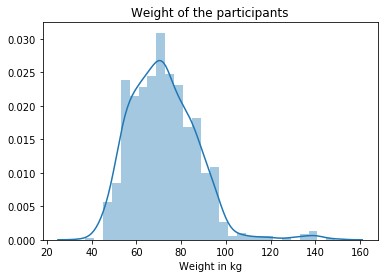

In [10]:
df['weight'].name = 'Weight in kg' #Labeling the variable for plotting
weight = df['weight'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(weight, kde=True) 
plt.title('Weight of the participants')
plt.show()

A few things are noticable from the distribution. The skew is very hard to see. However, I do believe the distribution is right-skewed. On top of that, they are a few outliers around the 140kg mark as there is a slight increase in the amount of people who are around that weight. However, the peak is very minimal and therefore as only one mode. So the distribution is unimodel. 

Now, I have to calculate the distribution of the weight and calculate the mean and the median and display them in the graph. 

The median weight is: 71.0 kg
The mean weight is: 72.10520607375271 kg


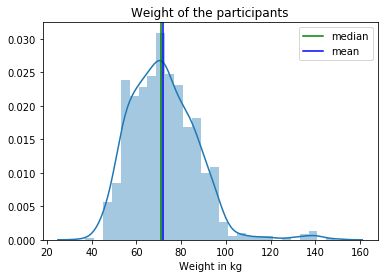

In [11]:
mean_size = df['weight'].mean()
median_size = df['weight'].median()

print(f'The median weight is: {median_size} kg')
print(f'The mean weight is: {mean_size} kg')

sns.distplot(weight, kde=True)
plt.title('Weight of the participants')
plt.axvline(median_size, 0, 100, color='green', label='median')
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() 
plt.show()

As you can see the mean is slighty higher than the median this confirms my finding of the distribution being right-skewed as I wasn't completely sure. 

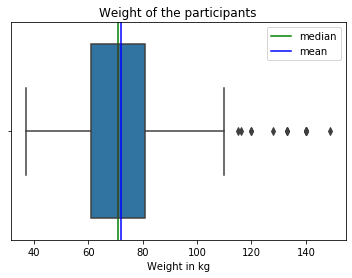

In [9]:
sns.boxplot(weight)
plt.title('Weight of the participants')
plt.axvline(median_size, 0, 100, color='green', label='median')
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() 
plt.show()